# Info

# Importing libraries

In [67]:
import numpy as np
import scipy as sc
import sympy as sy
import pandas as pd

import matplotlib.pyplot as plt

## AULA 01 - ESTATÍSTICA E ALGEBRA LINEAR EM PYTHON

### Algebra linear

$$ \alpha + \beta = 10$$

#### Escalar, vetor e matriz

In [30]:
x = 2 # escalar
x2 = np.array([1,2,3]) # -> vetor escalar com três elementos
x3 = np.array([[1],[2],[3]]) # -> matriz com três elementos vetores com um elemento escalar(2d)
x4 = np.array([[1,2,3], [1,2,3], [1,2,3]]) # -> matriz quadrada (tradicional)

In [27]:
print(x2)
print()
print(x3)
print()
print(x4)

[1 2 3]

[[1]
 [2]
 [3]]

[[1 2 3]
 [1 2 3]
 [1 2 3]]


##### Operações com arrays

##### Soma & subtração
Combinação lnear, soma de elementos multiplicaods entre si.

Fez uma distributiva criando uma matriz nova.

In [36]:
x2 + x3

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

Aqui não ocorreu o mesmo, pois as fontes (x3 e x4) não são da mesma coisa, ele forçou uma distributiva mas com coisas de dimensões (natureza) diferentes

In [38]:
x3 + x4

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

Distribuição com dimensões (naturezas) iguais, o que é o correta a acontecer.

In [41]:
x4 + x4

array([[2, 4, 6],
       [2, 4, 6],
       [2, 4, 6]])

! Somar e subtrair, só vetores/arrays de mesma natureza

##### Multiplicação
arr1 (x,y) / arr2 (z,w) y = z -> resultado arr3 (x,w)

testando a máxima acima (dimensões foras da regra):

In [50]:
np.dot(x3,x4)

ValueError: shapes (3,1) and (3,3) not aligned: 1 (dim 1) != 3 (dim 0)

In [47]:
np.dot(x4,x3)

array([[14],
       [14],
       [14]])

##### Divisão
x4 / x3

In [55]:
x4, x3

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[1],
        [2],
        [3]]))

Primeiro caso

In [54]:
x4 / x3

array([[1.        , 2.        , 3.        ],
       [0.5       , 1.        , 1.5       ],
       [0.33333333, 0.66666667, 1.        ]])

Segunda caso

In [58]:
x3 / x4

array([[1.        , 0.5       , 0.33333333],
       [2.        , 1.        , 0.66666667],
       [3.        , 1.5       , 1.        ]])

Terceiro caso

In [61]:
x3 / x5

ValueError: operands could not be broadcast together with shapes (3,1) (2,1) 


-> Não funciona, aí que entra: **equação fundamental da álgebra linear** que visa possibilitar conceitos e aplicações futuras como metódos dos mínimos quadrados (importante para trabalhar e entender algoritmos como regressão linear).

#### Pandas, dataframe

In [34]:
lista = np.array([1,2,3,4,5])
df = pd.DataFrame({'coluna 1': lista,
                  'coluna 2': lista})
df

,coluna 1,coluna 2
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


#### "Visualizando" Algebra linear

In [71]:
x1, y1 = -1, 0
x2, y2 = 0, 1
x3, y3 = 1, 2
x4, y4 = 2, 1

x = [x1, x2, x3, x4]
y = [y1, y2, y3, y4]

Text(0.5, 1.0, 'Interpolação da reta sobre todos os pontos - sem otimização pelo MMQ')

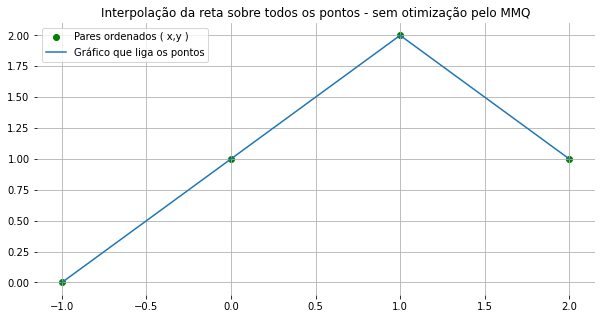

In [86]:
plt.figure(figsize=(10,5))
plt.scatter(x1, y1, color = 'green', label='Pares ordenados ( x,y )')
plt.scatter(x2, y2, color = 'green')
plt.scatter(x3, y3, color = 'green')
plt.scatter(x4, y4, color = 'green')

plt.plot(x, y, label = 'Gráfico que liga os pontos')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação da reta sobre todos os pontos - sem otimização pelo MMQ')

função para achar a "reta" numa função linear:

$$ y = mx + r $$

In [79]:
A = np.array([[-1,1], [0,1], [1,1], [2,1]])
y = np.array([[y1], [y2], [y3], [y4]])

In [80]:
A, y

(array([[-1,  1],
        [ 0,  1],
        [ 1,  1],
        [ 2,  1]]),
 array([[0],
        [1],
        [2],
        [1]]))

Metódo dos mínimos quadrados:

In [90]:
(m, n) = np.dot(np.dot(np.linalg.pinv(np.dot(A.T, A)), A.T), y)
print(mn, n)

[0.4] [0.8]


In [91]:
n

array([0.8])

Text(0.5, 1.0, 'Interpolação da reta sobre todos os pontos com otimização pelo MMQ')

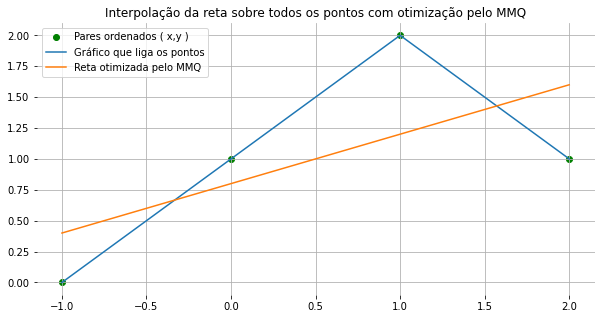

In [92]:
plt.figure(figsize=(10,5))
plt.scatter(x1, y1, color = 'green', label='Pares ordenados ( x,y )')
plt.scatter(x2, y2, color = 'green')
plt.scatter(x3, y3, color = 'green')
plt.scatter(x4, y4, color = 'green')

v_x = np.linspace(-1, 2)

plt.plot(x, y, label = 'Gráfico que liga os pontos')
plt.plot(v_x, m * v_x + n, label='Reta otimizada pelo MMQ')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação da reta sobre todos os pontos com otimização pelo MMQ')

In [95]:
m * v_x + n

array([0.4       , 0.4244898 , 0.44897959, 0.47346939, 0.49795918,
       0.52244898, 0.54693878, 0.57142857, 0.59591837, 0.62040816,
       0.64489796, 0.66938776, 0.69387755, 0.71836735, 0.74285714,
       0.76734694, 0.79183673, 0.81632653, 0.84081633, 0.86530612,
       0.88979592, 0.91428571, 0.93877551, 0.96326531, 0.9877551 ,
       1.0122449 , 1.03673469, 1.06122449, 1.08571429, 1.11020408,
       1.13469388, 1.15918367, 1.18367347, 1.20816327, 1.23265306,
       1.25714286, 1.28163265, 1.30612245, 1.33061224, 1.35510204,
       1.37959184, 1.40408163, 1.42857143, 1.45306122, 1.47755102,
       1.50204082, 1.52653061, 1.55102041, 1.5755102 , 1.6       ])

***

### Estatística